# Image Classification
##### Image Scene Classification of Multiclass


## Exploratory Data Analysis + Data Visualization + Modelling

### Importing Libraries


In [131]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix

from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import ResNet50

import warnings
warnings.filterwarnings('ignore')

## Loading our data

In [58]:
train_path = 'R:\Deep_Learning\Tensorflow\Kurs\Flying Vehicles\seg_train\seg_train'
test_path = 'R:\Deep_Learning\Tensorflow\Kurs\Flying Vehicles\seg_test\seg_test'
pred_path = 'R:\Deep_Learning\Tensorflow\Kurs\Flying Vehicles\seg_pred\seg_pred'

paths = [train_path , valid_path , pred_path]

## Data Visualization

In [56]:
# Get a list of all files and directories in the path
contents = os.listdir(path_to_images)

# Loop through each item in the list
for item in contents:
    # Check if the item is a directory
    if os.path.isdir(os.path.join(path_to_images, item)):
        print("Found directory:", item)

Found directory: buildings
Found directory: forest
Found directory: glacier
Found directory: mountain
Found directory: sea
Found directory: street


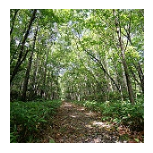

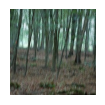

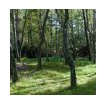

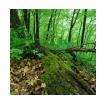

In [62]:
def plot_images(path , number_of_images , category):
    
    number_of_images += 1
    images = []
    
    if category:
        subdirectory = [category]
    else:
        subdirectory = os.listdir(path)
        
    for s in subdirectory:
        sub_directory_path = os.path.join(path, s)

        for filename in os.listdir(sub_directory_path):
            img_path = os.path.join(sub_directory_path , filename)
            img = cv2.imread(img_path)
            
            if img is not None:
                images.append(img)
                
            if len(images) == number_of_images:
                break
                
        if len(images) == number_of_images:
            break
        
    plt.figure(figsize=(10, 10))
    
    for i in range(1, number_of_images):
        plt.subplot(1, number_of_images ,i)
        plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

plot_images(train_path , 4 , 'forest')     

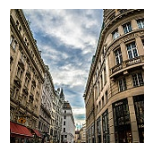

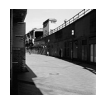

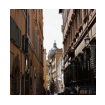

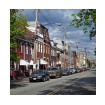

In [61]:
plot_images(test_path , 4 , 'street')

## Data Augmentation

In [64]:
BATCH_SIZE = 64
IMAGE_SIZE = 150

In [67]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                  vertical_flip=True,
                                  rescale=1.0/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest',
                                  zoom_range=0.2
                                 )
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [87]:
train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                    target_size=(IMAGE_SIZE , IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')     
test_generator = test_datagen.flow_from_directory(directory=test_path,
                                                  target_size=(IMAGE_SIZE , IMAGE_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical')
test_generator, train_generator

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


(<keras.src.preprocessing.image.DirectoryIterator at 0x236077df6d0>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x236249a7ed0>)

## Build Model

In [123]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(512,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten() ,    
        keras.layers.Dense(128,activation='relu') ,            
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

In [124]:
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [125]:
tensorborad = TensorBoard(log_dir='logs')

In [126]:
steps_train = len(train_generator) 
steps_test = len(test_generator) 

In [128]:
history = model.fit_generator(generator=train_generator ,
                              steps_per_epoch=steps_train,
                              epochs=40,
                              validation_data=test_generator,
                              validation_steps=steps_test,
                              callbacks=[tensorborad]
                             )
                             

Epoch 1/40
220/220 [==============================] - 82s 369ms/step - loss: 1.4378 - accuracy: 0.3673 - val_loss: 1.2360 - val_accuracy: 0.4563
Epoch 2/40
220/220 [==============================] - 80s 365ms/step - loss: 1.2337 - accuracy: 0.4605 - val_loss: 1.0738 - val_accuracy: 0.5450
Epoch 3/40
220/220 [==============================] - 81s 369ms/step - loss: 1.1759 - accuracy: 0.5019 - val_loss: 1.0228 - val_accuracy: 0.5673
Epoch 4/40
220/220 [==============================] - 80s 365ms/step - loss: 1.1046 - accuracy: 0.5558 - val_loss: 0.8648 - val_accuracy: 0.6627
Epoch 5/40
220/220 [==============================] - 94s 425ms/step - loss: 1.0500 - accuracy: 0.5944 - val_loss: 0.8843 - val_accuracy: 0.6543
Epoch 6/40
220/220 [==============================] - 92s 416ms/step - loss: 0.9931 - accuracy: 0.6171 - val_loss: 0.7933 - val_accuracy: 0.6880
Epoch 7/40
220/220 [==============================] - 92s 416ms/step - loss: 0.9403 - accuracy: 0.6402 - val_loss: 0.8115 - val_ac

## Transfer learning - model ResNet50

In [98]:
base_model = ResNet50(include_top=False , weights='imagenet', input_shape=(IMAGE_SIZE ,IMAGE_SIZE ,3))
base_model.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [102]:
def print_layers(model):
    for layer in model.layers:
        print(f'layer_name: {layer.name:13} trainable: {layer.trainable}')

print_layers(base_model)

layer_name: input_1       trainable: False
layer_name: conv1_pad     trainable: False
layer_name: conv1_conv    trainable: False
layer_name: conv1_bn      trainable: False
layer_name: conv1_relu    trainable: False
layer_name: pool1_pad     trainable: False
layer_name: pool1_pool    trainable: False
layer_name: conv2_block1_1_conv trainable: False
layer_name: conv2_block1_1_bn trainable: False
layer_name: conv2_block1_1_relu trainable: False
layer_name: conv2_block1_2_conv trainable: False
layer_name: conv2_block1_2_bn trainable: False
layer_name: conv2_block1_2_relu trainable: False
layer_name: conv2_block1_0_conv trainable: False
layer_name: conv2_block1_3_conv trainable: False
layer_name: conv2_block1_0_bn trainable: False
layer_name: conv2_block1_3_bn trainable: False
layer_name: conv2_block1_add trainable: False
layer_name: conv2_block1_out trainable: False
layer_name: conv2_block2_1_conv trainable: False
layer_name: conv2_block2_1_bn trainable: False
layer_name: conv2_block2_1_re

In [103]:
model_2 = Sequential()
model_2.add(base_model)
model_2.add(layers.Flatten())
model_2.add(layers.Dense(units=128 , activation='relu' ))
model_2.add(layers.Dense(units=6 , activation='softmax'))

model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 51200)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               6553728   
                                                                 
 dense_13 (Dense)            (None, 6)                 774       
                                                                 
Total params: 30142214 (114.98 MB)
Trainable params: 6554502 (25.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [105]:
model_2.compile(optimizer=optimizers.RMSprop(learning_rate=0.001) , loss='categorical_crossentropy' , metrics=['accuracy'])

In [106]:
history = model_2.fit_generator(generator=train_generator ,
                                epochs=10,
                                validation_data=test_generator,
                                callbacks=[tensorborad]
                             )

Epoch 1/10
220/220 [==============================] - 185s 820ms/step - loss: 2.4506 - accuracy: 0.2565 - val_loss: 1.5773 - val_accuracy: 0.3350
Epoch 2/10
220/220 [==============================] - 184s 836ms/step - loss: 1.7293 - accuracy: 0.3297 - val_loss: 1.5158 - val_accuracy: 0.3967
Epoch 3/10
220/220 [==============================] - 184s 834ms/step - loss: 1.5350 - accuracy: 0.3706 - val_loss: 1.4177 - val_accuracy: 0.4147
Epoch 4/10
220/220 [==============================] - 178s 809ms/step - loss: 1.4280 - accuracy: 0.3874 - val_loss: 1.3281 - val_accuracy: 0.4430
Epoch 5/10
220/220 [==============================] - 203s 924ms/step - loss: 1.3855 - accuracy: 0.4105 - val_loss: 1.2407 - val_accuracy: 0.4917
Epoch 6/10
220/220 [==============================] - 201s 914ms/step - loss: 1.3514 - accuracy: 0.4283 - val_loss: 1.2230 - val_accuracy: 0.4737
Epoch 7/10
220/220 [==============================] - 202s 920ms/step - loss: 1.3322 - accuracy: 0.4346 - val_loss: 1.2490 -

# Evalute our model

In [137]:
score = model.evaluate_generator(test_generator)
print('\nScore [ {} ] '.format(dict(zip(model.metrics_names, score))))


Score [ {'loss': 0.4794522821903229, 'accuracy': 0.8253333568572998} ] 


In [138]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

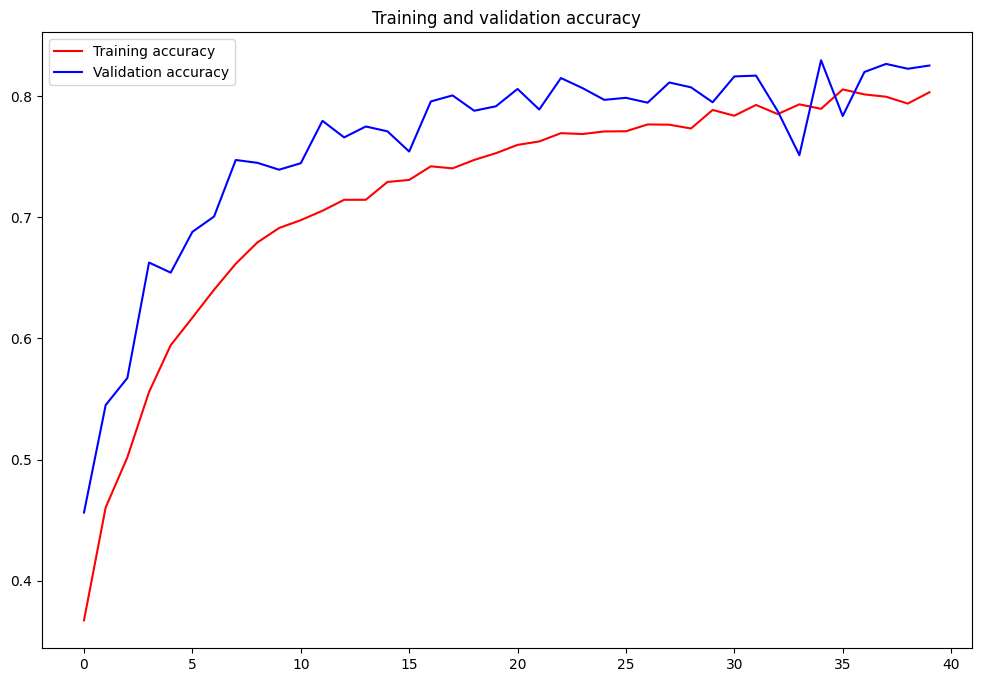

In [139]:
plt.figure(figsize=(12,8))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

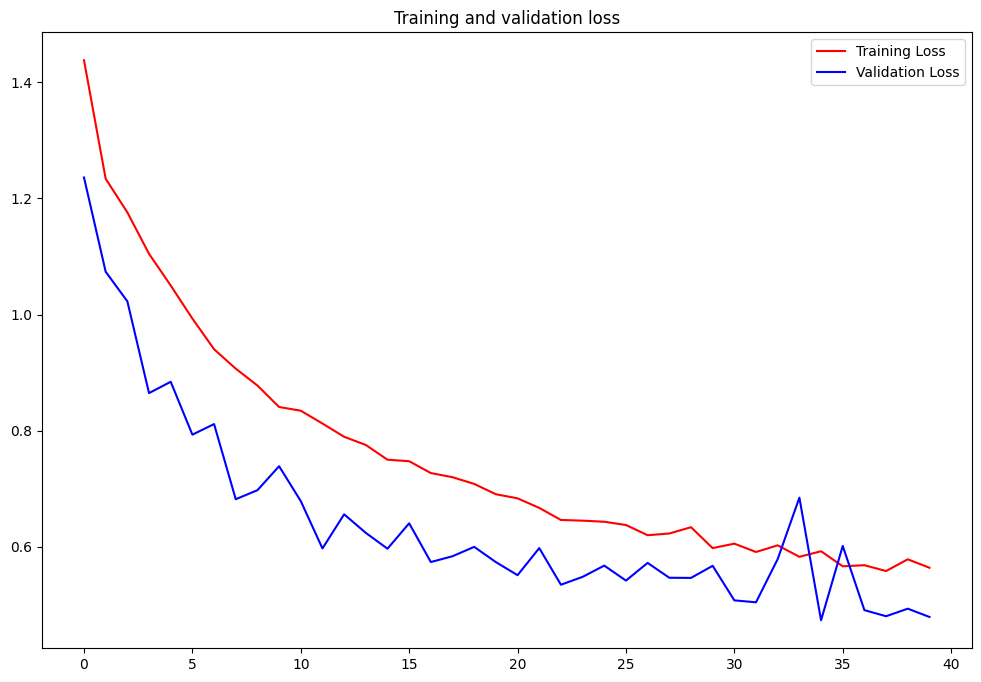

In [140]:
plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()